<a href="https://colab.research.google.com/github/dablro12/AI_study/blob/main/Lab04_linear_nonlinear%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd 
import random
import math as math

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/data/0327/data0327.xlsx')
df.head()

,취미,운동,공부,수면,오늘기분
0,8.0,0.0,2.0,12.0,0.0
1,3.0,0.0,3.0,7.0,1.0
2,1.0,0.0,5.0,7.0,1.0
3,2.0,1.0,6.0,8.0,3.0
4,3.0,2.0,2.0,7.0,5.0


In [3]:
x = torch.tensor(df.iloc[:,:-1].to_numpy()).to(torch.float32) #x_class를 4개니까 4개 가지고오고, numpy형태로바꿧다가 float 값을 가진 tensor로 바꿔주기
y = torch.tensor(df.iloc[:,-1].to_numpy()).to(torch.float32) #y_class는 1개니까 -> df -> numpy -> tensor
print(x.shape)
print(y.shape)

x_vd = x.clone()
y_vd = y.clone()


torch.Size([33, 4])
torch.Size([33])


In [4]:
#data loader 만들기
def data_iter(data, label, batch_size):
  N,num_features = data.shape
  inds = list(range(N))
  random.shuffle(inds)
  for i in range(0,N,batch_size):
    batch_inds = inds[i:min(i+batch_size, N)]
    batch_data = data[batch_inds,:]
    batch_label = label[batch_inds]
    yield batch_data, batch_label
  
  

## linear mode

In [48]:
#model, loss function, algorithms 정의
model = nn.Linear(4,1) #nn.linear(input feature, output feature)
loss = nn.MSELoss() #L2 loss 
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9) #학습이 잘되도록 모멘텀을 넣어준다.

In [ ]:
#############training 과정#################
#Hyper param config
batch_size = 33 #만약 배치사이즈
epoch = 10000
loss_valid_epoch = [] #epoch한번 돌떄마다 loss값 저장
#batch사이즈만큼 돌았을때 loss값 저장 : list 크기[step 개수] : epoch * 데이터 개수 / batch사이즈
loss_valid_step = []
i = 1

for j in np.arange(0, epoch):
  iterations = data_iter(x, y, batch_size)
  for batch_X, batch_y in iterations:
    y_hat = model(batch_X) #model에서 y의 예측값을 가지고옴
    l = loss(y_hat, batch_y.reshape(y_hat.shape)) #lossfunction을 통해 차이만큼 계산 L2 loss
    optimizer.zero_grad() #gradient를 0으로 초기화 
    l.sum().backward() #역전파 계산
    optimizer.step() #역전파 계산을 통해 만들어진 gradient를 이용해서 parameter를 업데이트
    loss_valid_step.append(l.sum().detach()/len(batch_X)) #loss tensor값을 다 합해서 값들만 남겨놓고(detach), batch size만큼 나눠서 한개당 로스값 구함
    #print(f"{i} step loss: {l.sum().detach()/len(batch_X)}") #step loss 확인
    i += 1
  #validation data에 대해 값구해주기
  y_vd_hat = model(x_vd) #1 epoch 돌았을때의 모델 파라미터를 가지고 예측값 구하기
  l_all = loss(y_vd_hat, y_vd) #loss 값 구하기
  loss_valid_epoch.append(l_all.sum().detach()/len(x_vd)) #loss 값 저장
  #print(f"{j+1} epoch loss : {l_all.sum().detach()/len(x_vd)}") #epoch loss 확인

  #loss_valid_epoch.append(l_all)
  #print(len(loss_valid_step))
#print(loss_valid_epoch)



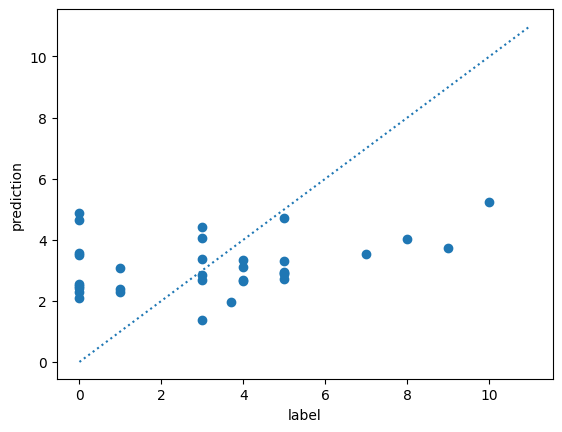

In [50]:
plt.scatter(y,y_vd_hat.detach().numpy())
plt.plot(np.arange(0,12),np.arange(0,12),':')
plt.xlabel('label')
plt.ylabel('prediction')
plt.show()
     


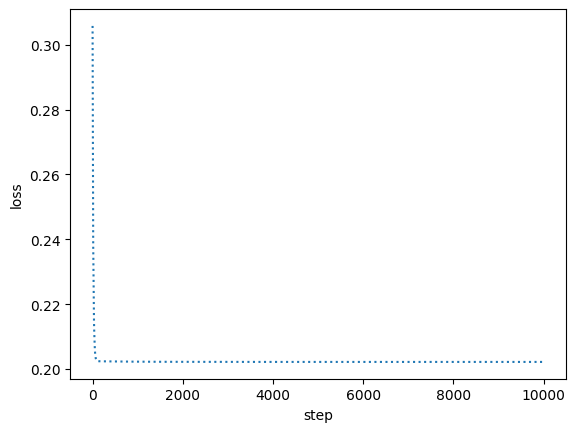

In [51]:
plt.plot(loss_valid_step,':')
plt.xlabel('step')
plt.ylabel('loss')
#plt.axis([0,42,0,150])
plt.show()

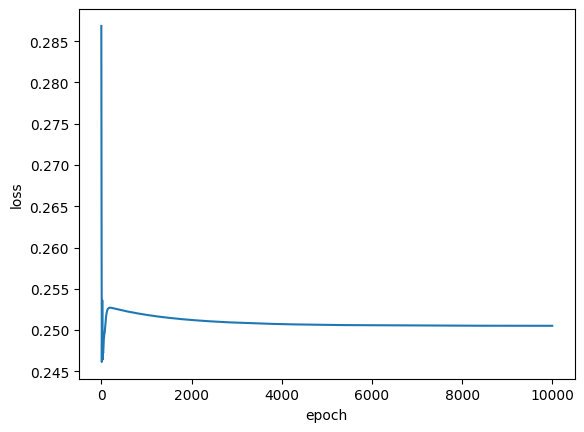

In [52]:
plt.plot(loss_valid_epoch)
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.axis([0,15,0,100])
plt.show()

## non linear

In [32]:
#model, loss function, algorithms 정의
model = nn.Sequential(
    #hidden Layer
    nn.Linear(4,1000),
    nn.ReLU(),
    #output Layer
    nn.Linear(1000,1),
    )
loss = nn.MSELoss() #L2 loss 
optimizer = optim.SGD(model.parameters(), lr = 0.00042) #학습이 잘되도록 모멘텀을 넣어준다.
print('c')

c


In [ ]:
#############training 과정#################
#Hyper param config
batch_size = 33 #만약 배치사이즈
epoch = 10000
loss_valid_epoch = [] #epoch한번 돌떄마다 loss값 저장
#batch사이즈만큼 돌았을때 loss값 저장 : list 크기[step 개수] : epoch * 데이터 개수 / batch사이즈
loss_valid_step = []
i = 1

for j in np.arange(0, epoch):
  iterations = data_iter(x, y, batch_size)
  for batch_X, batch_y in iterations:
    y_hat = model(batch_X) #model에서 y의 예측값을 가지고옴
    l = loss(y_hat, batch_y.reshape(y_hat.shape)) #lossfunction을 통해 차이만큼 계산 L2 loss
    optimizer.zero_grad() #gradient를 0으로 초기화 
    #print(l.shape)
    l.sum().backward() #역전파 계산
    optimizer.step() #역전파 계산을 통해 만들어진 gradient를 이용해서 parameter를 업데이트
    loss_valid_step.append(l.sum().detach()/len(batch_X)) #loss tensor값을 다 합해서 값들만 남겨놓고(detach), batch size만큼 나눠서 한개당 로스값 구함
    #print(f"{i} step loss: {l.sum().detach()/len(batch_X)}") #step loss 확인
    i += 1
  #validation data에 대해 값구해주기
  y_vd_hat = model(x_vd) #1 epoch 돌았을때의 모델 파라미터를 가지고 예측값 구하기
  l_all = loss(y_vd_hat, y_vd) #loss 값 구하기
  loss_valid_epoch.append(l_all.sum().detach()/len(x_vd)) #loss 값 저장
  #print(f"{j+1} epoch loss : {l_all.sum().detach()/len(x_vd)}") #epoch loss 확인

  #loss_valid_epoch.append(l_all)
  #print(len(loss_valid_step))
#print(loss_valid_epoch)



tensor([0.0417], grad_fn=<SelectBackward0>)
tensor(0.)


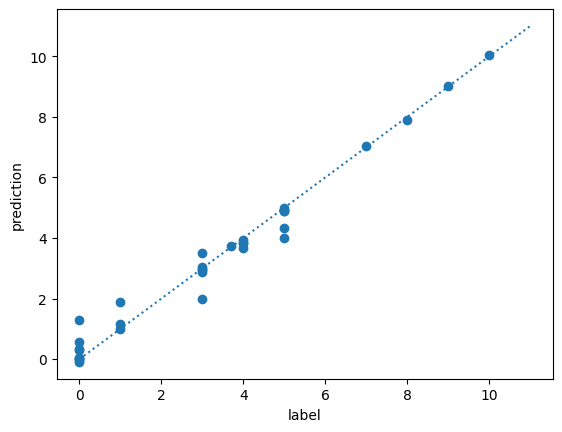

In [45]:
print((y_vd_hat[0]))
print((y[0]))
plt.scatter(y,y_vd_hat.detach().numpy())
plt.plot(np.arange(0,12),np.arange(0,12),':')
plt.xlabel('label')
plt.ylabel('prediction')
plt.show()

     


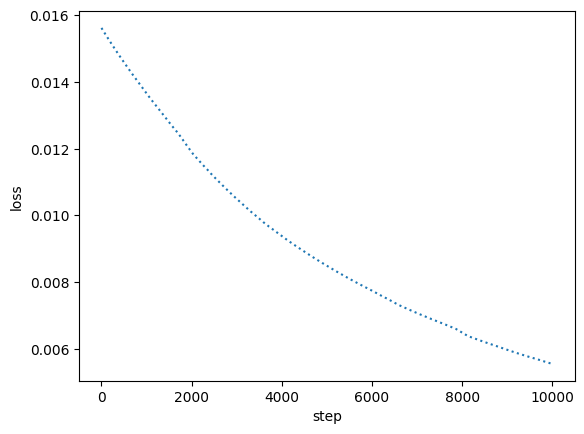

In [46]:
plt.plot(loss_valid_step,':')
plt.xlabel('step')
plt.ylabel('loss')
#plt.axis([0,42,0,150])
plt.show()

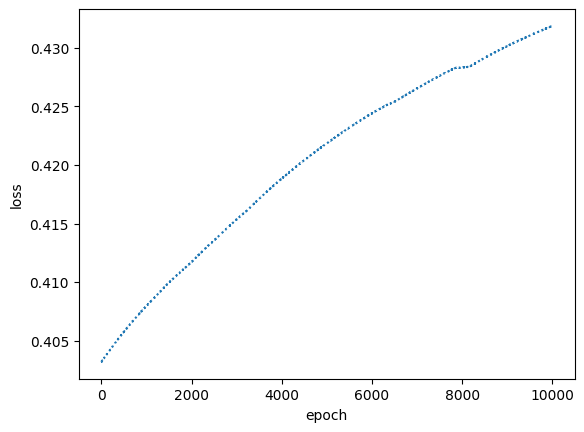

In [47]:
plt.plot(loss_valid_epoch, ':')
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.axis([0,15,0,100])
plt.show()

### MLP에 활성함수 들어간 것이 확연히 성능차이가 존재한다!
